In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = ['Heiti TC']

fp = font_manager.FontProperties()
fp.set_family('SimHei')
fp.set_size(14)

In [2]:
date = datetime.now().strftime('%Y%m%d')
df = pd.read_csv(f'./data/trend/city/daily/{date}/重庆-{date}.csv')
df['date'] = pd.to_datetime(df.date)
df.head()

,date,新增无症状,新增本土,新增本土无症状,city,area
0,2022-03-20,0,0,0,重庆,奉节县
1,2022-03-21,0,0,0,重庆,奉节县
2,2022-03-22,0,0,0,重庆,奉节县
3,2022-03-23,0,0,0,重庆,奉节县
4,2022-03-24,0,0,0,重庆,奉节县


In [3]:
df.dtypes

date       datetime64[ns]
新增无症状               int64
新增本土                int64
新增本土无症状             int64
city               object
area               object
dtype: object

In [4]:
main_areas = ['江北区', '渝中区', '南岸区', '九龙坡区', '沙坪坝区', '渝北区', '两江新区', '巴南区', '大渡口区']
query = (df.date > pd.to_datetime('2022-10-24')) * (df.area.isin(main_areas))

<AxesSubplot: xlabel='date', ylabel='新增无症状'>

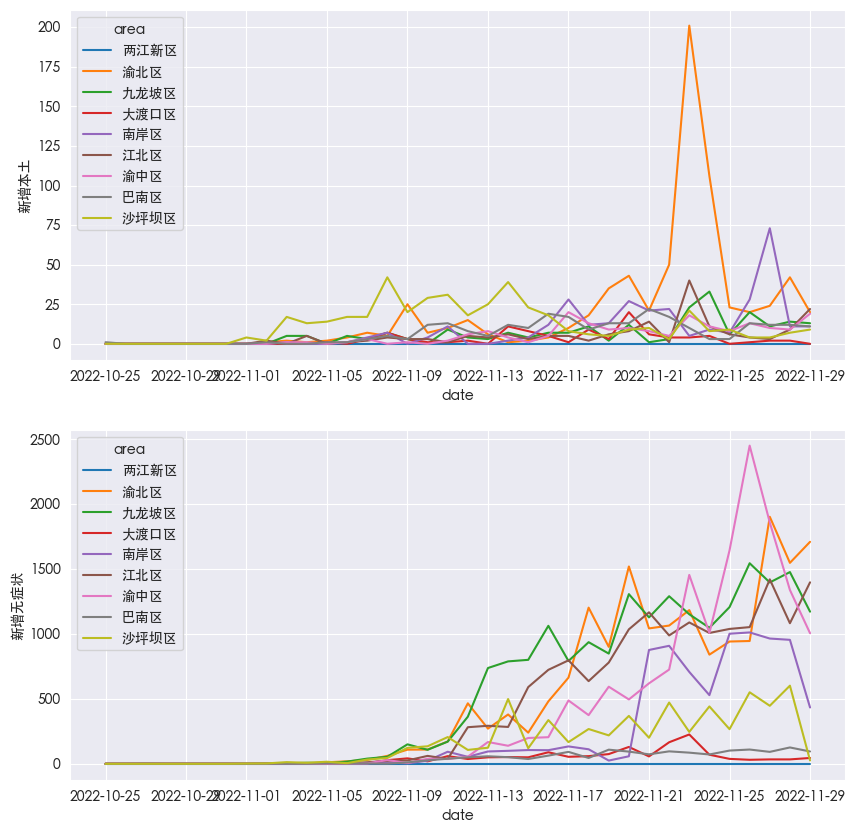

In [5]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(2, 1)
plt.subplot(211)
sns.lineplot(df[query], x='date', y='新增本土', hue='area')
plt.subplot(212)
sns.lineplot(df[query], x='date', y='新增无症状', hue='area')

In [6]:
df_summary = pd.read_csv(f'./data/summary/city/重庆/{date}/重庆-{date}.csv')
df_summary.dtypes

area                             object
confirmed                         int64
died                            float64
crued                             int64
asymptomaticRelative              int64
confirmedRelative                 int64
asymptomaticLocalRelative         int64
asymptomatic                    float64
nativeRelative                    int64
screeningPositive                 int64
curAsymptomaticLocalRelative    float64
updateTime                        int64
curConfirm                        int64
noNativeRelativeDays             object
dtype: object

In [7]:
df_summary.head()

,area,confirmed,died,crued,asymptomaticRelative,confirmedRelative,asymptomaticLocalRelative,asymptomatic,nativeRelative,screeningPositive,curAsymptomaticLocalRelative,updateTime,curConfirm,noNativeRelativeDays
0,奉节县,74,0.0,39,2,4,2,0.0,4,0,NaN,1669769848,35,NaN
1,武隆区,30,0.0,8,1,1,1,0.0,1,0,NaN,1669769848,22,NaN
2,永川区,178,0.0,137,14,7,14,0.0,7,0,NaN,1669769848,41,NaN
3,两江新区,18,0.0,18,0,0,0,0.0,0,0,NaN,1669769848,0,连续8个月无新增病例
4,渝北区,757,0.0,435,1710,20,1710,0.0,20,0,NaN,1669769848,322,NaN


<AxesSubplot: xlabel='asymptomaticRelative', ylabel='area'>

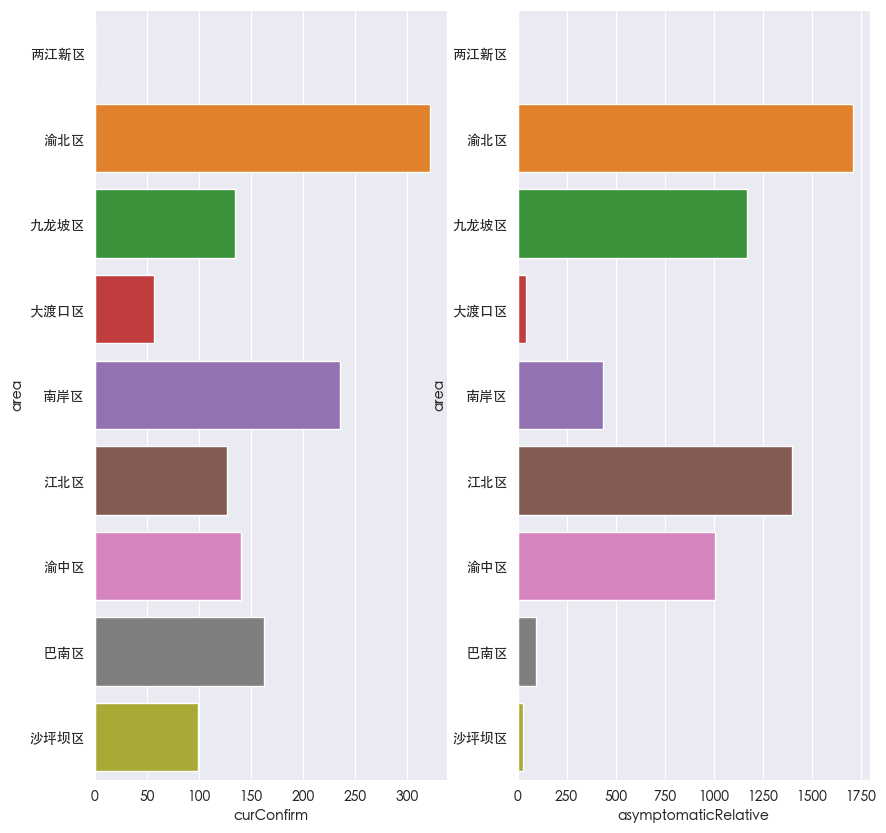

In [8]:
fig = plt.figure(figsize=(10, 10))
fig.subplots(1, 2)
query = df_summary.area.isin(main_areas)
plt.subplot(121)
sns.barplot(df_summary[query], x='curConfirm', y='area')
plt.subplot(122)
sns.barplot(df_summary[query], x='asymptomaticRelative', y='area')
# plt.subplot(133)
# sns.barplot(df_summary[query], x='curConfirm', y='area')
